# Example Mission Tracks

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

import mission_tools

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
bathy_file = '../microSWIFT_data/FRFdata/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'

Number of microSWIFTs: 19


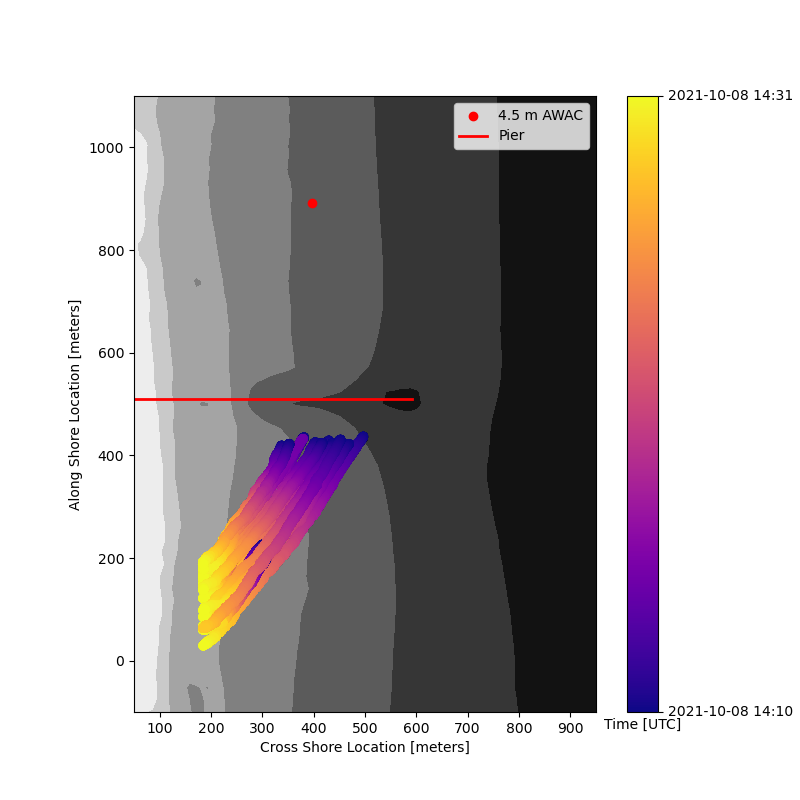

In [6]:
mission_nc_path = '../microSWIFT_data/final_dataset/mission_16.nc'
mission_dataset = nc.Dataset(mission_nc_path, mode='r')
mission_tools.plot_mission_tracks(mission_dataset, bathy_file)
mission16_time = np.median(mission_dataset['time'][:])
print('Number of microSWIFTs: {}'.format(mission_dataset['trajectory'].size))

/opt/homebrew/Caskroom/mambaforge/base/envs/dunex-venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Number of microSWIFTs: 13


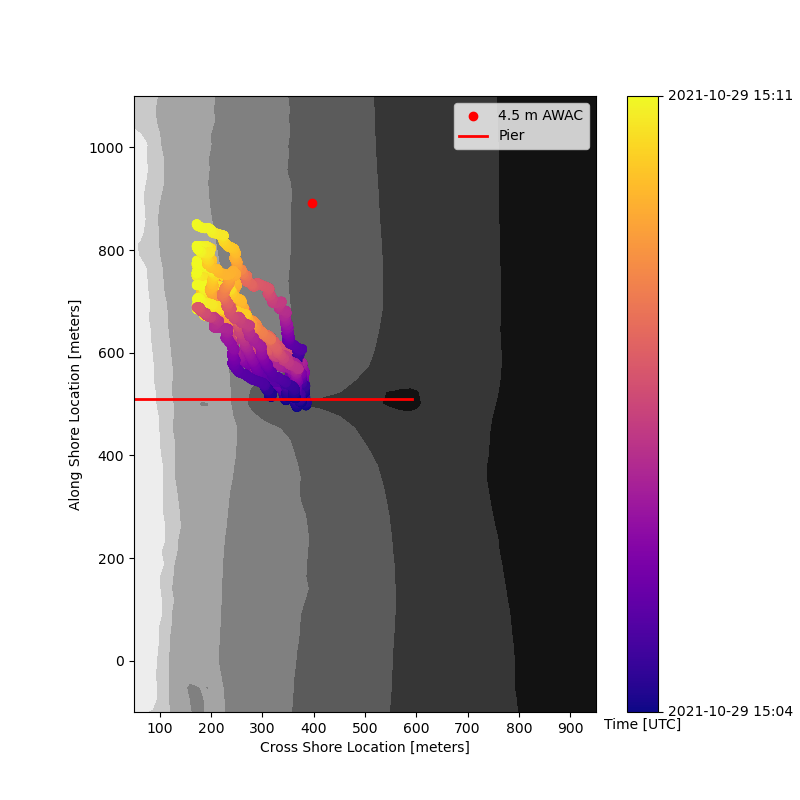

In [5]:
mission_nc_path = '../microSWIFT_data/final_dataset/mission_79.nc'
mission_dataset = nc.Dataset(mission_nc_path, mode='r')
mission_tools.plot_mission_tracks(mission_dataset, bathy_file)
mission79_time = np.median(mission_dataset['time'][:])
print('Number of microSWIFTs: {}'.format(mission_dataset['trajectory'].size))

In [27]:
# Add in breaking location start based on gamma value for area and average shoreline location
# Based on Raubenheimer 1996 the average gamma value at Duck is approximately .35
gamma = 0.35
awac_file = '../microSWIFT_data/FRFdata/FRF-ocean_waves_8m-array_202110.nc'
mission16_hs = mission_tools.closest_awac_sig_wave_height(mission16_time, awac_file)
mission79_hs = mission_tools.closest_awac_sig_wave_height(mission79_time, awac_file)
print(mission16_hs)
print(mission79_hs)

# Compute depth that waves should be breaking in 
mission16_break_depth = mission16_hs / gamma
mission79_break_depth = mission79_hs / gamma
print(mission16_break_depth)
print(mission79_break_depth)

# Cross Shore Location for start of Breaking
bathy_dataset = nc.Dataset(bathy_file)

# Create grid from coordinates
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]

mission16_xs_gamma_location = np.interp(-mission16_break_depth, np.flip(np.nanmean(bathy, axis=0)), np.flip(bathy_dataset['xFRF'][:]))
mission79_xs_gamma_location = np.interp(-mission79_break_depth, np.flip(np.nanmean(bathy, axis=0)), np.flip(bathy_dataset['xFRF'][:]))
print(mission16_xs_gamma_location)
print(mission79_xs_gamma_location)

# Get shoreline location from waterlevel data
waterlevel_file = '../microSWIFT_data/FRFdata/FRF-ocean_waterlevel_eopNoaaTide_202110.nc'
waterlevel_dataset = nc.Dataset(waterlevel_file)
waterlevel = waterlevel_dataset['waterLevel'][:]
waterlevel_time = waterlevel_dataset['time'][:]
mission16_waterlevel = np.interp(mission16_time, waterlevel_time, waterlevel)
print(mission16_waterlevel)
mission79_waterlevel = np.interp(mission79_time, waterlevel_time, waterlevel)
print(mission79_waterlevel)

mission16_shoreline_location = np.interp(mission16_waterlevel, np.flip(np.nanmean(bathy, axis=0)), np.flip(bathy_dataset['xFRF'][:]))
mission79_shoreline_location = np.interp(mission79_waterlevel, np.flip(np.nanmean(bathy, axis=0)), np.flip(bathy_dataset['xFRF'][:]))
print(mission16_shoreline_location)
print(mission79_shoreline_location)

1.1235056348898234
2.146967639846354
3.21001609968521
6.1341932567038695
268.14985946938094
535.2977514470824
0.851083319007964
0.5949999371409413
106.15904404262245
110.34026137929547


Number of microSWIFTs: 19


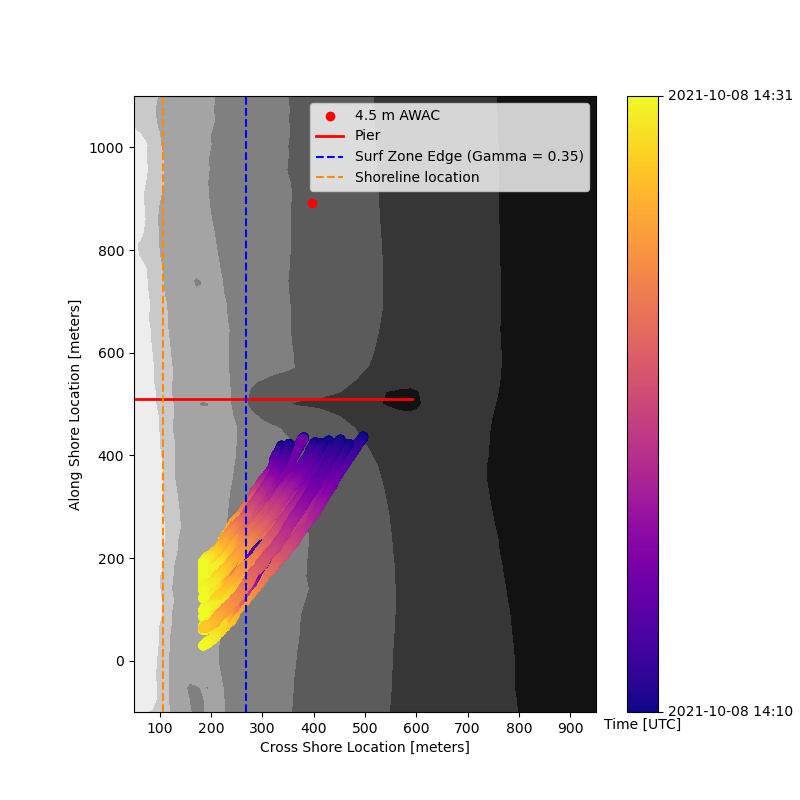

In [28]:
mission_nc_path = '../microSWIFT_data/final_dataset/mission_16.nc'
mission_dataset = nc.Dataset(mission_nc_path, mode='r')
mission16_ax = mission_tools.plot_mission_tracks(mission_dataset, bathy_file)
mission16_ax.axvline(mission16_xs_gamma_location, label='Surf Zone Edge (Gamma = 0.35)', color='b', linestyle='dashed')
mission16_ax.axvline(mission16_shoreline_location, label='Shoreline location', color='darkorange', linestyle='dashed')
mission16_ax.legend()
print('Number of microSWIFTs: {}'.format(mission_dataset['trajectory'].size))

Number of microSWIFTs: 13


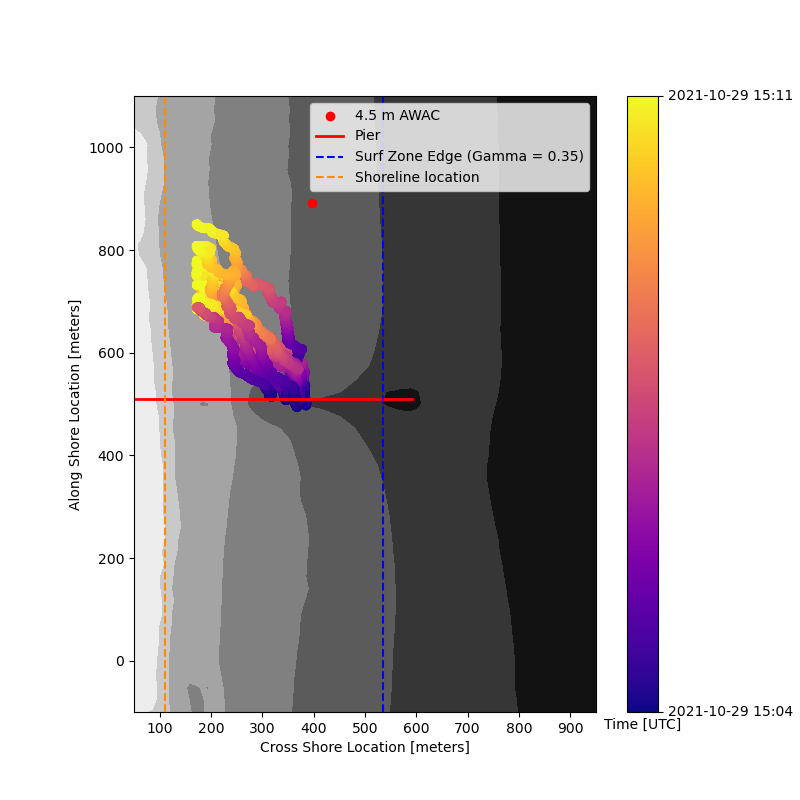

In [29]:
mission_nc_path = '../microSWIFT_data/final_dataset/mission_79.nc'
mission_dataset = nc.Dataset(mission_nc_path, mode='r')
mission79_ax = mission_tools.plot_mission_tracks(mission_dataset, bathy_file)
mission79_ax.axvline(mission79_xs_gamma_location, label='Surf Zone Edge (Gamma = 0.35)', color='b', linestyle='dashed')
mission79_ax.axvline(mission79_shoreline_location, label='Shoreline location', color='darkorange', linestyle='dashed')
mission79_ax.legend()
print('Number of microSWIFTs: {}'.format(mission_dataset['trajectory'].size))